In [6]:
import pandas as pd
import numpy as np

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('diamonds.csv')

In [65]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
df.shape

(53940, 10)

In [67]:
#checking null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [68]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [69]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
lb = LabelEncoder()

In [72]:
df['cut_encoded']=lb.fit_transform(df['cut'])
df['color_encoded']=lb.fit_transform(df['color'])
df['clarity_encoded']=lb.fit_transform(df['clarity'])

In [73]:
df['cut_encoded'] = df['cut_encoded'].astype(float)

In [74]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.0,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2.0,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4.0,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.0,4,3


<AxesSubplot:>

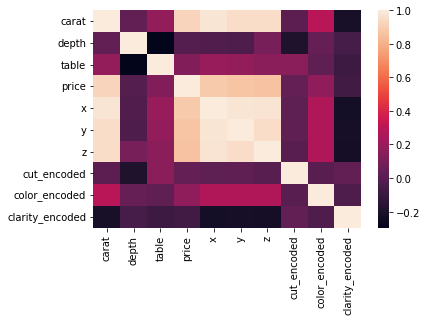

In [83]:
sns.heatmap(df.drop(['cut','color','clarity'], axis=1).corr())

In [84]:
df.drop(['cut','color','clarity'], axis=1).corr()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,-0.088223
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,-0.071535
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,-0.224263
cut_encoded,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.028235
color_encoded,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,-0.027795
clarity_encoded,-0.214290,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,0.028235,-0.027795,1.000000


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [105]:
lr = LinearRegression()

In [112]:
X = df.drop(['cut','color','clarity','price','depth','cut_encoded','clarity_encoded'],axis=1)
y = df['price']

In [113]:
X

,carat,table,x,y,z,color_encoded
0,0.23,55.0,3.95,3.98,2.43,1
1,0.21,61.0,3.89,3.84,2.31,1
2,0.23,65.0,4.05,4.07,2.31,1
3,0.29,58.0,4.20,4.23,2.63,5
4,0.31,58.0,4.34,4.35,2.75,6
...,...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50,0
53936,0.72,55.0,5.69,5.75,3.61,0
53937,0.70,60.0,5.66,5.68,3.56,0
53938,0.86,58.0,6.15,6.12,3.74,4


In [114]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2529)


In [116]:
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
lr.score(X_test,y_test)

0.8605837962581273

In [118]:
lr.score(X_train,y_train)

0.8687284745976519

In [119]:
import pickle

In [ ]:
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)